Model Score: 95


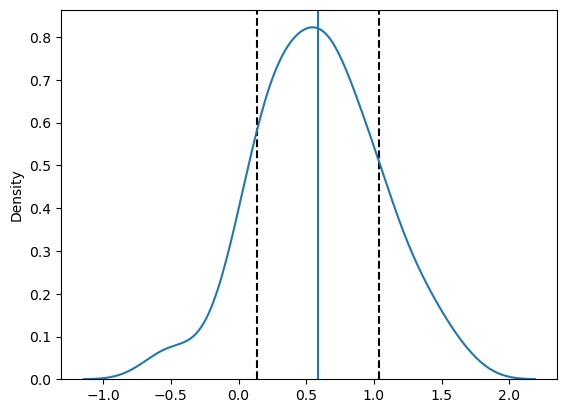

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import norm

#import data
fb = pd.read_excel('sentiment.xlsx')

# split data at comma
fb = fb['Text, Sentiment, Source, Date/Time, User ID, Location, Confidence Score'].str.split(',', expand=True)

#format data into tabular format
fb = fb.set_axis(['Text', 'Sentiment', 'Source', 'Date/Time', 'User ID', 'Location', 'Confidence Score'], axis=1)

#inspect data negative sentiment = 43, positive sentiment = 56 out of 96
fb.groupby('Sentiment').describe()

#drop features
df = fb.drop(columns=(["Source", "Date/Time", "User ID", "Location", "Confidence Score"]), axis=1)

#save new dataset to excel
df.to_excel('modified.xlsx')

#import data
data = pd.read_excel('modified.xlsx')

#Turning negative/positive into numerical data by creating new column called negative
data['negative'] = data['Sentiment'].map(lambda x: 1 if x == ' Positive' else 0)

#drop Unnamed: 0 column
data = data.drop(columns=(["Unnamed: 0"]), axis=1)

#Create train/test split
x_train, x_test,y_train, y_test = train_test_split(data.Text, data.negative, test_size=0.20, random_state=1)

#find word count and store data as a matrix
cv = CountVectorizer()
x_train_count = cv.fit_transform(x_train.values)

#convert matrix array
x_train_count.toarray()

#train model
model = MultinomialNB()
model.fit(x_train_count, y_train)
MultinomialNB()

#pre-test positive sentiment
sentiment_pos = ["It is an incredible product"]
sentiment_pos_count = cv.transform(sentiment_pos)
model.predict(sentiment_pos_count)

#pre-test negative sentiment
sentiment_neg =["young cookie click"]
sentiment_neg_count = cv.transform(sentiment_neg)
model.predict(sentiment_neg_count)

#test model
x_test_count = cv.transform(x_test)
model.score(x_test_count, y_test)

#Probability density function
# Netative 0.552083 =mean, 0.49989 = std Count = 96
negative_sent = norm.rvs(loc=0.552083, scale = 0.49989, size= 96, random_state = 1)
negative_mean = negative_sent.mean()
negative_std = negative_sent.std()
#show lines of mean, one std before mean, and one std after mean
plt.axvline(negative_mean)
plt.axvline(negative_mean+negative_std, ls ="--", color ="black")
plt.axvline(negative_mean-negative_std, ls ="--", color ="black")
#graph 
sns.kdeplot(negative_sent)

print('Model Score:',  round(model.score(x_test_count, y_test) * 100))


                                                                                                           